0.9913108523813997 0.3376989771231128


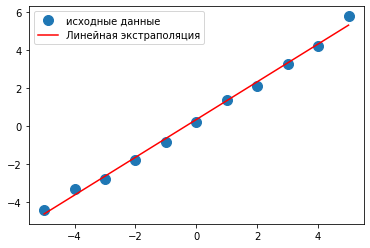

In [17]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

x = linspace(-5, 5, 11)
y = x + (rand(11) - 0.5)

A =  vstack([x, ones(len(x))]).T
m, c = linalg.lstsq(A, y, rcond = None)[0]
print(m, c)
plt.plot(x, y, 'o', label='исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

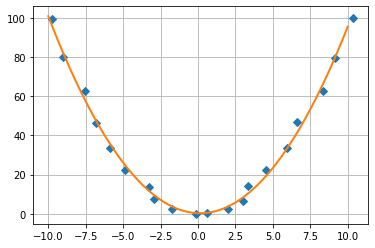

In [22]:
delta = 1.0
x = linspace(-10, 10, 20)
y = x**2 + delta*(rand(20) - 0.5)
x += delta*(rand(20) - 0.5)

m = vstack((x**2, x, ones(20))).T
s = linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-10, 10, 110)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()


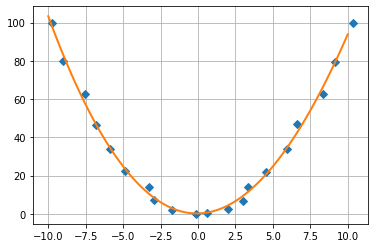

In [23]:
m = vstack((x**3, x**2, x, ones(20))).T
s = linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-10, 10, 110)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=2)
plt.grid()

[0.29919327 0.80006417]
8.464140911643725e-07
24.89306557468592


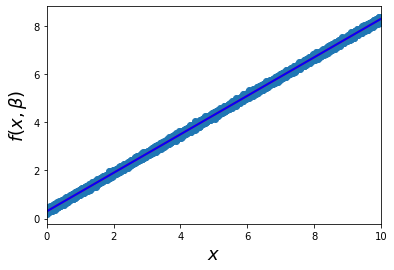

In [46]:
import scipy
def f(x, b0, b1):
    return b0 + b1 * x

beta = (0.3, 0.8)
xdata = linspace(0, 10, 100)
y = f(xdata, *beta)
ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {"Годовой стаж": [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3,
                           5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
           "Зарплата": [39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00,
                        57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00,
                        81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 109431.00, 105582.00, 116969.00,
                        112635.00, 122391.00, 121872.00]}
dataset = pd.DataFrame(my_dict)
dataset.head()

,Годовой стаж,Зарплата
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [60]:
print(dataset.shape)
dataset.describe()

(30, 2)


,Годовой стаж,Зарплата
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


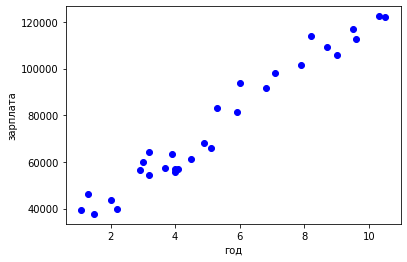

In [61]:
plt.scatter(dataset["Годовой стаж"], dataset["Зарплата"], color='b', label="данные")
plt.xlabel("год")
plt.ylabel("зарплата")
plt.show()

In [62]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [63]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


In [68]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


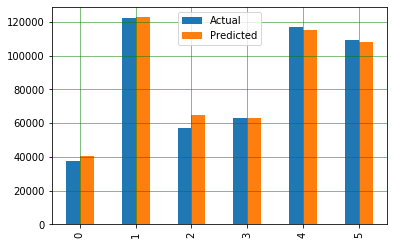

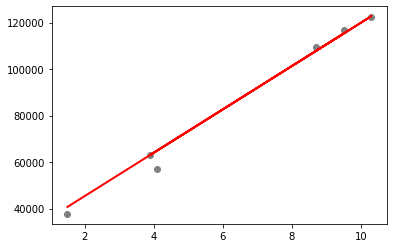

In [69]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [80]:
from sklearn import metrics
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataframe = pd.read_csv(url)
dataframe.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [82]:
x = dataframe[['alcohol', 'sulphates', 'pH',
               'density', 'total sulfur dioxide',
               'free sulfur dioxide', 'chlorides',
              'residual sugar', 'citric acid', 'volatile acidity',
              'fixed acidity']]
y = dataframe['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
alcohol,0.267797
sulphates,0.924040
pH,-0.254486
density,-31.516666
total sulfur dioxide,-0.002777
free sulfur dioxide,0.002684
chlorides,-1.873407
residual sugar,0.027870
citric acid,-0.177927
volatile acidity,-1.149528


In [83]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


In [84]:
print("mse", metrics.mean_squared_error(y_test, y_pred))

mse 0.3844711978201256
